C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Degree = 2
Accuracy stats of Non Linear Regression :
Accuracy with a margin of 100$ :  0.0
Accuracy with a margin of 50$ :  0.0
Accuracy with a margin of 25$ :  0.0
Accuracy with a margin of 10$ :  0.0
Average error :  1621568.98459

Degree = 3
Accuracy stats of Non Linear Regression :
Accuracy with a margin of 100$ :  0.0
Accuracy with a margin of 50$ :  0.0
Accuracy with a margin of 25$ :  0.0
Accuracy with a margin of 10$ :  0.0
Average error :  37704178930.6

Degree = 4
Accuracy stats of Non Linear Regression :
Accuracy with a margin of 100$ :  0.0
Accuracy with a margin of 50$ :  0.0
Accuracy with a margin of 25$ :  0.0
Accuracy with a margin of 10$ :  0.0
Average error :  2.05877710693e+13



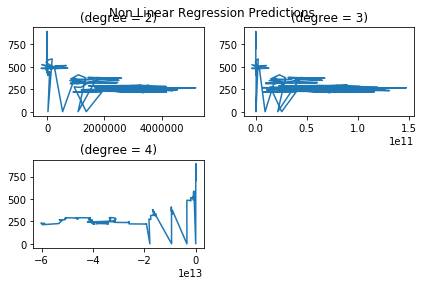

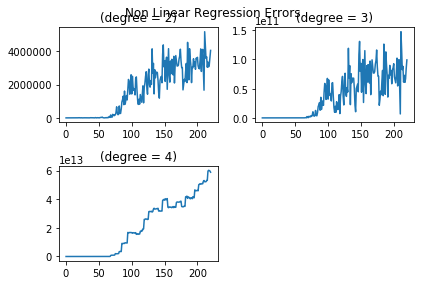

In [7]:
'''
Nonlinear regression
'''

import matplotlib.pyplot as plt
import pandas
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np



def init():
    # Load input data
    ipdata = pandas.read_csv("C://Users//User//Desktop//ML//Project//bitcoin_dataset.csv",  parse_dates=['Date'])

    # Drop rows with NaN
    for key in ipdata:
        try:
            ipdata = ipdata[np.isfinite(ipdata[key])]
        except:
            pass
    ipdata['next'] = pandas.Series([0] * len(ipdata['btc_market_price']), index = ipdata.index)
    ipdata = ipdata.drop('btc_trade_volume', 1)
    
    for ind in ipdata.index:
        try:
            ipdata.ix[ind, 'next'] = ipdata['btc_market_price'][ind+1]
        except:
            if ind == max(ipdata.index):
                pass
        

    return ipdata.drop([max(ipdata.index)])

# Load input data
ipdata = init()
del ipdata['Date']

X = ipdata.copy(deep=True)
del X['next']
y = ipdata['next']

# Split into training and testing set; 80:20 split
rows = round(0.8 * len(ipdata.index))
trainSet = X[:rows]
testSet = X[rows:]
trainDependant = y[:rows]
testDependant = y[rows:]

fig = plt.figure()
errors = dict()
plot_no = 1
for d in range(2, 5):
    print("Degree =", d)

    # Generate a model of polynomial features
    poly = PolynomialFeatures(degree=d)

    # Transform the x data for proper fitting
    trainSet_t = poly.fit_transform(trainSet)

    # Generate the regression object
    model = linear_model.LinearRegression()
    # Preform the actual regression
    model.fit(trainSet_t, trainDependant)

    
    testSet_t = poly.fit_transform(testSet)

    # Predict for test set
    prediction = [float(x) for x in model.predict(testSet_t)]

    print("Accuracy stats of Non Linear Regression :")
    accuracyStats(list(prediction), list(testDependant))
    
    fig.add_subplot(2, 2, plot_no)
    plt.plot(list(prediction), list(testDependant))
    plt.title('(degree = ' + str(d) + ')')
    plot_no += 1

    errors[d] = [math.fabs(x - y) for x,y in zip(list(prediction), list(testDependant))]
    print("Average error : ", np.average(errors[d]))
    print()

    poly = model = None

plt.suptitle('Non Linear Regression Predictions')
plt.tight_layout()
fig.tight_layout()
plt.show()

fig2 = plt.figure()
plot_no = 1
for d in sorted(list(errors.keys())):
    fig2.add_subplot(2, 2, plot_no)
    plot_no += 1
    plt.plot(errors[d])
    plt.title('(degree = ' + str(d) + ')')

plt.suptitle('Non Linear Regression Errors')
plt.tight_layout()
fig.tight_layout()
plt.show()

